In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.7


In [3]:
from lmfit import *

## Crichton problem

- need temperature vs time data for all of the station (csv files in one folder)
- need rural/urban info for each station
- location (latitude, logitude) for each station


- for each file do ....
    - load data
    - fit to a line
    - get the slope of the line
    - store those values


- average of all the slopes?  (X)
- count all positives/negatives for rural, urban -- fraction of positive for rural vs urban
- average urban average rural, look statistical test on the average

- go through all the urban stations
    - find the closest rural station
    - I already have the slopes - rural slope value, and an urban slope value
    
- plot the difference (histogram)
- plot rural slope (y-axis) vs urban slope (x-axis)


In [4]:
from glob import glob

In [15]:
time_series_folder='/Users/bblais/Desktop/time series'
fnames=glob(time_series_folder+'/*.csv')
fnames=fnames[:10]

In [16]:
len(fnames)

10

In [17]:
fnames

['/Users/bblais/Desktop/time series/CARACAS-LA CARLOTA.csv',
 '/Users/bblais/Desktop/time series/TAREE.csv',
 '/Users/bblais/Desktop/time series/YAXIAN.csv',
 '/Users/bblais/Desktop/time series/MOANDA.csv',
 '/Users/bblais/Desktop/time series/MINDEN.csv',
 '/Users/bblais/Desktop/time series/NORFOLK INTL AP.csv',
 '/Users/bblais/Desktop/time series/BRISBANE REGIONAL OFFI.csv',
 '/Users/bblais/Desktop/time series/CHARLOTTESVILLE 2W.csv',
 '/Users/bblais/Desktop/time series/CLEVELAND-CLE.csv',
 '/Users/bblais/Desktop/time series/ALGONA 3 W.csv']

In [18]:
station_info=pd.read_excel('data/station_info.xlsx')
station_info.head()

,ID,Station,Latitude,Longitude,Brightness,Elevation
0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0
1,AE000041196,SHARJAH_INTER_AIRP,25.3330,55.5170,39.0,34.0
2,AEM00041184,RAS_AL_KHAIMAH_INTE,25.6170,55.9330,17.0,31.0
3,AEM00041194,DUBAI_INTL,25.2550,55.3640,104.0,10.4
4,AEM00041216,ABU_DHABI_BATEEN_AIR,24.4300,54.4700,114.0,3.0


In [19]:
fname=fnames[0]

In [25]:
data=pd.read_csv(fname)
data=data.dropna()
x_data=data['Year']
y_data=data['Temperature']
data

,Year,Temperature
0,1964,22.600000
1,1965,22.283333
2,1966,22.600000
3,1967,21.883333
4,1968,22.145455
5,1969,22.900000
6,1970,22.166667
7,1971,22.300000
8,1972,22.533333
9,1973,22.420000


In [26]:
model=models.LinearModel()
result=model.fit(y_data,x=x_data)

In [27]:
result

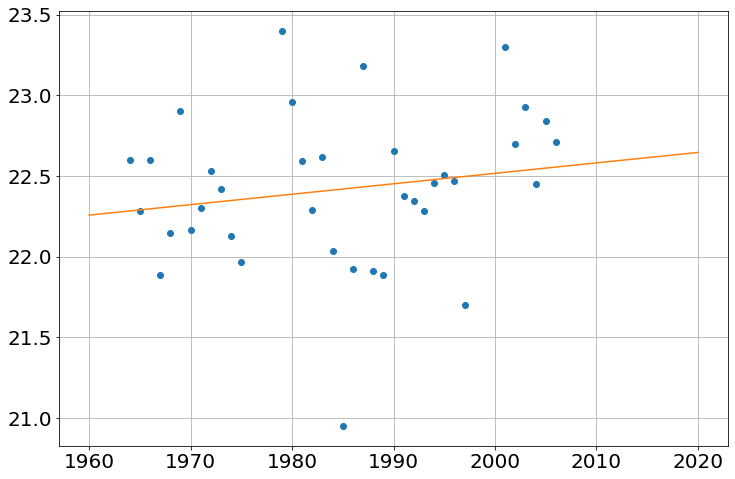

In [28]:
plot(x_data,y_data,'o')

x_fake=linspace(1960,2020,100)
y_fake=result.eval(x=x_fake)
plot(x_fake,y_fake,'-')

In [31]:
result.params['slope'].value

0.0064731124429220355

In [34]:
def get_slope(fname,plotit=False):
    data=pd.read_csv(fname)
    data=data.dropna()
    x_data=data['Year']
    y_data=data['Temperature']
    model=models.LinearModel()
    result=model.fit(y_data,x=x_data)
    
    if plotit:
        plot(x_data,y_data,'o')

        x_fake=linspace(1960,2020,100)
        y_fake=result.eval(x=x_fake)
        plot(x_fake,y_fake,'-')        
    
    return result.params['slope'].value

In [37]:
get_slope(fname)

0.0064731124429220355

In [38]:
def myfunction(x,a=1):
    return x+a

In [41]:
myfunction(7,10)

17

In [44]:
time_series_folder='/Users/bblais/Desktop/time series'
fnames=glob(time_series_folder+'/*.csv')
#fnames=fnames[:10]

In [45]:
S=Storage()

for filename in fnames:
    value=get_slope(filename)
    #print(filename,value)
    
    S+=value,

slopes=S.arrays()
slopes

array([ 0.00647311,  0.01124634,  0.02107082, ...,  0.07761284,
       -0.00230143,  0.0250974 ])

In [50]:
station_names=list(station_info['Station'])

In [51]:
len(station_names)

27440

In [52]:
name=station_names[0]
name

'SAVE'

In [53]:
glob(time_series_folder+"/"+name+".csv")

['/Users/bblais/Desktop/time series/SAVE.csv']

In [58]:
station_info[station_info['Station']==name].iloc[0]  # gets the first row matching name

ID            ACW00011604
Station              SAVE
Latitude          57.7667
Longitude         11.8667
Brightness           45.0
Elevation            18.0
Name: 0, dtype: object

In [59]:
fnames[:10]

['/Users/bblais/Desktop/time series/CARACAS-LA CARLOTA.csv',
 '/Users/bblais/Desktop/time series/TAREE.csv',
 '/Users/bblais/Desktop/time series/YAXIAN.csv',
 '/Users/bblais/Desktop/time series/MOANDA.csv',
 '/Users/bblais/Desktop/time series/MINDEN.csv',
 '/Users/bblais/Desktop/time series/NORFOLK INTL AP.csv',
 '/Users/bblais/Desktop/time series/BRISBANE REGIONAL OFFI.csv',
 '/Users/bblais/Desktop/time series/CHARLOTTESVILLE 2W.csv',
 '/Users/bblais/Desktop/time series/CLEVELAND-CLE.csv',
 '/Users/bblais/Desktop/time series/ALGONA 3 W.csv']

In [60]:
fname=fnames[0]
fname

'/Users/bblais/Desktop/time series/CARACAS-LA CARLOTA.csv'

In [66]:
import os

In [68]:
parts=os.path.split(fname)
parts

('/Users/bblais/Desktop/time series', 'CARACAS-LA CARLOTA.csv')

In [69]:
parts[-1]

'CARACAS-LA CARLOTA.csv'

In [71]:
print("hello\there\n")

hello	here



In [72]:
base,ext=os.path.splitext(parts[-1])

In [73]:
base

'CARACAS-LA CARLOTA'

In [74]:
ext

'.csv'

In [75]:
def station_name_from_filename(filename):
    parts=os.path.split(filename)
    base,ext=os.path.splitext(parts[-1])
    return base

In [78]:
station_name_from_filename(fnames[3])

'MOANDA'

In [85]:
def first_row(station_name):
    if '.csv' in station_name:
        station_name=station_name_from_filename(station_name)
    
    return station_info[station_info['Station']==station_name].iloc[0]    

In [86]:
first_row(station_name_from_filename(fnames[3]))

ID            GB000004565
Station            MOANDA
Latitude            -1.53
Longitude           13.27
Brightness            0.0
Elevation           572.0
Name: 7521, dtype: object

In [87]:
first_row(fnames[3])

ID            GB000004565
Station            MOANDA
Latitude            -1.53
Longitude           13.27
Brightness            0.0
Elevation           572.0
Name: 7521, dtype: object

In [84]:
fnames[3]

'/Users/bblais/Desktop/time series/MOANDA.csv'